In [69]:
import json
import shutil
from pathlib import Path
from IPython.display import Image

import cv2
import numpy as np
from tqdm import tqdm

In [82]:
# train or val
data_type = 'val'

# instances: bboxやセグメンテーション情報が含まれている
# captions: 画像がなんの画像なのかアノテーションされている
annotation_file = Path(f'./dataset/coco/annotations_trainval/annotations/instances_{data_type}2017.json')

with annotation_file.open() as f:
    annotations = json.load(f)

In [29]:
def draw_bbox(image, x, y, width, height, line_color=(0, 0, 255), line_width=2):
    """
    画像にbboxを描画(複数個のbboxを付与する場合、複数回この関数を呼び出すこと)
    Args:
        image[np.ndarray]: bboxを描画する画像
        x[int]: bboxの左上の座標
        y[int]: bboxの右上の座標
        height[int]: bboxの高さ
        width[int]: bboxの幅
        line_color[tuple[int]]: bboxを描画する色をGBR形式(≠RGB)で指定
        line_width[int]: bboxの線の太さを指定
    Returns:
        image_with_bbox[np.ndarray(画像の幅x高さx3)]: bboxを描画した画像
    """
    image_with_bbox = cv2.rectangle(image, (x, y), (x + width, y + height), line_color, line_width)
    return image_with_bbox


def draw_marker(image, x, y, color=(255, 0, 0), marker_size=20):
    return cv2.drawMarker(image, (x, y), color, markerSize=marker_size)

def convert_bbox(bbox):
    """
    COCOデータセットデフォルトの
        [左上x座標, 右下x座標, 左上y座標, 右下y座標]
    から、
        [左上x座標, 左上y座標, bboxの幅, bboxの高さ]
    の形式に変換

    Args:
        bbox[List[int, int, int, int]]: COCOデータセットデフォルトのbbox
    Returns:
        converted_bbox[List[int, int, int, int]]: 変換後のbbox
    """
    x_upper_left, x_lower_right, y_upper_left, y_lower_right = bbox

    width = x_lower_right - x_upper_left
    height = y_lower_right - y_upper_left

    converted_bbox = [x_upper_left, y_upper_left, width, height]
    return converted_bbox

In [83]:
# image_idをキーにして、同じ画像に対するアノテーション情報を集約
temp_dict = {}
for annotation in annotations['annotations']:
    image_id = str(annotation['image_id']).zfill(12)
    # image_path = image_dir / f'{image_id}.jpg'

    bbox = np.round(annotation['bbox']).astype(int)
    bbox_size = (bbox[2] * bbox[3])
    category_id = annotation['category_id']

    new_annotation = {
        'category_id': category_id,
        'bbox': bbox.tolist(),
        'bbox_size': bbox_size,
    }

    if image_id in temp_dict:
        temp_dict[image_id].append(new_annotation)
    else:
        temp_dict[image_id] = [new_annotation]
temp_dict

{'000000289343': [{'category_id': 18,
   'bbox': [473, 396, 39, 29],
   'bbox_size': 1131},
  {'category_id': 1, 'bbox': [204, 235, 61, 177], 'bbox_size': 10797},
  {'category_id': 15, 'bbox': [0, 500, 340, 106], 'bbox_size': 36040},
  {'category_id': 2, 'bbox': [204, 304, 53, 153], 'bbox_size': 8109}],
 '000000061471': [{'category_id': 18,
   'bbox': [272, 200, 152, 280],
   'bbox_size': 42560},
  {'category_id': 44, 'bbox': [181, 86, 27, 74], 'bbox_size': 1998},
  {'category_id': 70, 'bbox': [175, 0, 261, 221], 'bbox_size': 57681}],
 '000000472375': [{'category_id': 18,
   'bbox': [125, 196, 373, 357],
   'bbox_size': 133161},
  {'category_id': 4, 'bbox': [59, 51, 501, 391], 'bbox_size': 195891},
  {'category_id': 47, 'bbox': [289, 70, 28, 27], 'bbox_size': 756},
  {'category_id': 47, 'bbox': [313, 77, 27, 23], 'bbox_size': 621}],
 '000000520301': [{'category_id': 18,
   'bbox': [113, 155, 367, 479],
   'bbox_size': 175793}],
 '000000579321': [{'category_id': 18,
   'bbox': [201, 90,

In [85]:
image_dir = Path('./dataset/coco/images/validation2017/val2017')
dataset_dir = Path('./dataset/reshaped_coco/dataset_validation/')

for i, (image_id, annotations) in enumerate(tqdm(temp_dict.items())):
    annotation_path = dataset_dir / f'{str(i).zfill(8)}.json'

    image_path = image_dir / f'{image_id}.jpg'
    shutil.copy(image_path, annotation_path.with_suffix('.jpg'))

    with open(annotation_path, 'w') as f:
        json.dump(annotations, f, indent=2)

100%|██████████| 4952/4952 [00:21<00:00, 234.35it/s]


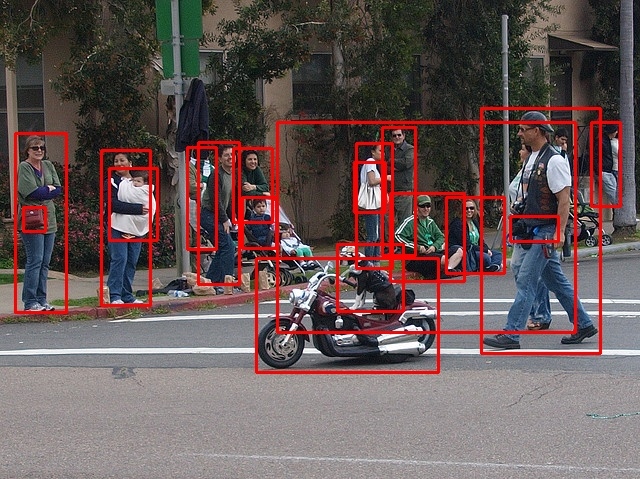

In [68]:
annotations = temp_dict['000000495357']
image_id = '000000495357'
# 画像の読み込み
image = cv2.imread(str(image_dir / f'{image_id}.jpg'))
# bbox = convert_bbox(annotation['bbox'])
# cv2で扱うようにint型に変換
image_with_bbox = image
for annotation in annotations:
    bbox = annotation['bbox']
    image_with_bbox = drow_bbox(image_with_bbox, *bbox)

# 描画用変換
# image_with_dot = drow_marker(image_with_bbox, 200, 200)
# image_RGB = cv2.cvtColor(image_with_bbox, cv2.COLOR_BGR2RGB)
Image(cv2.imencode('.jpg', image_with_bbox)[1].tobytes())

In [56]:
annotations['annotations'][1]

{'segmentation': [[640,
   408.25,
   639.54,
   4.33,
   546.25,
   5.29,
   426.04,
   1.44,
   427,
   3.37,
   538.56,
   12.98,
   558.75,
   63.95,
   555.87,
   95.69,
   557.79,
   138.01,
   566.45,
   171.67,
   579.91,
   189.94,
   587.61,
   225.52,
   570.3,
   292.84,
   560.68,
   311.11,
   566.45,
   340.93,
   570.3,
   365.93,
   587.61,
   369.78,
   599.15,
   339.97,
   614.53,
   378.43,
   626.07,
   393.82,
   639.54,
   410.17],
  [405.84,
   2.4,
   438.54,
   49.53,
   454.89,
   75.49,
   454.89,
   112.04,
   450.08,
   130.31,
   458.74,
   151.47,
   467.39,
   174.55,
   394.3,
   145.7,
   398.15,
   79.34,
   392.38,
   45.68,
   330.83,
   20.68,
   310.63,
   19.72,
   276.01,
   15.87,
   249.08,
   12.98,
   231.77,
   13.94,
   218.31,
   12.98,
   208.69,
   7.21,
   206.77,
   3.37]],
 'num_keypoints': 2,
 'area': 39122.6331,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [29]:
annotations['images'][0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

In [ ]:
image_id = []
for anno_info in annotations['annotations']:
    if anno_info['image_id'] not in image_id:
        image_id.append(anno_info['image_id'])
    else:
        print(anno_info)

In [39]:
len(annotations['annotations'])

860001

In [41]:
len(annotations['annotations'])

747458

In [ ]:
annotation.keys()

In [ ]:
annotation['images']

In [37]:
annotations['annotations'][4]

{'segmentation': [[251.87,
   356.13,
   260.13,
   343.74,
   300.39,
   335.48,
   323.1,
   335.48,
   340.65,
   335.48,
   366.45,
   334.45,
   377.81,
   333.42,
   359.23,
   337.55,
   332.39,
   340.65,
   300.39,
   346.84,
   267.35,
   349.94,
   252.9,
   355.1,
   252.9,
   355.1]],
 'area': 800.4132499999978,
 'iscrowd': 0,
 'image_id': 200365,
 'bbox': [251.87, 333.42, 125.94, 22.71],
 'category_id': 58,
 'id': 1072}

In [52]:
annotations['categories']

[{'supercategory': 'person',
  'id': 1,
  'name': 'person',
  'keypoints': ['nose',
   'left_eye',
   'right_eye',
   'left_ear',
   'right_ear',
   'left_shoulder',
   'right_shoulder',
   'left_elbow',
   'right_elbow',
   'left_wrist',
   'right_wrist',
   'left_hip',
   'right_hip',
   'left_knee',
   'right_knee',
   'left_ankle',
   'right_ankle'],
  'skeleton': [[16, 14],
   [14, 12],
   [17, 15],
   [15, 13],
   [12, 13],
   [6, 12],
   [7, 13],
   [6, 7],
   [6, 8],
   [7, 9],
   [8, 10],
   [9, 11],
   [2, 3],
   [1, 2],
   [1, 3],
   [2, 4],
   [3, 5],
   [4, 6],
   [5, 7]]}]